<figure>
  <IMG SRC="../../logo/logo.png" WIDTH=250 ALIGN="right">
</figure>

# IHE Python course, 2017

# Time series manipulation

T.N.Olsthoorn, 
April 18, 2017


Most scientists and engineers, including hydrologists, physisists, electronic engineers, social scientists and economists are often faced with time series that bear information that is to be extracted or to be used in predictions. Pandas has virtually all the tools that are required to handle time series, while keeping dates and data strictly connected. These time series loaded into pandas then form the basis of further analysis.

Loading into pandas can be done with pd.read_csv, pd.read_table, pd.read_excel as we used before as well as with numerous other functions ready to be using in pandas. Just use tab-complition to see al the possibilities

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Show which reading functions pandas has as onboard methods.

We can use a coprehension to select what we want:

In [6]:
[d for d in dir(pd) if d.startswith("read")]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_msgpack',
 'read_pickle',
 'read_sas',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

In [ ]:
pd.read_table()

In [3]:
[d for d in dir(pd) if d.startswith("read")]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_msgpack',
 'read_pickle',
 'read_sas',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

Hence there's a large number of possibilities.

Move to the directory with the examples. Then print pwd to see if you're there.

Notice, the first part of the pwd command will be different on your computer.

In [7]:
cd python/IHEcourse2017/exercises/Apr18/

[Errno 2] No such file or directory: 'python/IHEcourse2017/exercises/Apr18/'
/Users/Theo/GRWMODELS/python/IHEcourse2017/exercises/Apr18


In [8]:
pwd

'/Users/Theo/GRWMODELS/python/IHEcourse2017/exercises/Apr18'

See if we have a csv datafile, which is a long year groundwater head series in the south of the Netherlands (chosen more or less at random for its length).

In [9]:
ls

B50E0133001_1.csv*        TimeSeriesSampling.ipynb  threeDoorsQuiz.ipynb
B50E0133001_1.xls         sorting.ipynb


It's not a bad habit to use os to verify that the file exists.

In [88]:
import os
os.path.isfile("B50E0133001_1.csv")

True

Ok, now we will naively try to read it in using pd.read_csv. This may fail or not. If it fails we sharpen the knife by adding or using one or more options provided by pd.read_csv.

In [10]:
pb = pd.read_csv("B50E0133001_1.csv")
pb.head()

CParserError: Error tokenizing data. C error: Expected 12 fields in line 12, saw 13


Obviously, the read_csv above failed. Upon inspection of the file in an editor, we see that the top is a mess. Not really, but at least we want to sktip this part and get to the actual time series data of interest further down in the file.

So let's skip a few rows (too few, but we can correct step by step)

In [11]:
pb = pd.read_csv("B50E0133001_1.csv", skiprows=9)
pb.head()

,MP:,Meetpunt,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
Locatie,Filternummer,Externe aanduiding,X-coordinaat,Y-coordinaat,Maaiveld (cm t.o.v. NAP),Datum maaiveld gemeten,Startdatum,Einddatum,Meetpunt (cm t.o.v. NAP),Meetpunt (cm t.o.v. MV),Bovenkant filter (cm t.o.v. NAP),Onderkant filter (cm t.o.v. NAP)
B50E0133,001,50EP0133,129287,395441,1360,11-03-1955,11-03-1955,10-09-1969,1401,41,-240,-340
B50E0133,001,50EP0133,129287,395441,1360,10-09-1969,10-09-1969,15-02-2011,1401,41,-240,-340
B50E0133,001,50EP0133,129287,395441,1357,15-02-2011,15-02-2011,13-10-2016,1448,91,-240,-340
Locatie,Filternummer,Peildatum,Stand (cm t.o.v. MP),Stand (cm t.o.v. MV),Stand (cm t.o.v. NAP),Bijzonderheid,Opmerking,NaN,NaN,NaN,NaN,NaN


Ok, we got some top table in the file. See which line pd thought was the header.

Ok. skip a few more lines.

In [12]:
pb = pd.read_csv("B50E0133001_1.csv", skiprows=11)
pb.head()

,Locatie,Filternummer,Externe aanduiding,X-coordinaat,Y-coordinaat,Maaiveld (cm t.o.v. NAP),Datum maaiveld gemeten,Startdatum,Einddatum,Meetpunt (cm t.o.v. NAP),Meetpunt (cm t.o.v. MV),Bovenkant filter (cm t.o.v. NAP),Onderkant filter (cm t.o.v. NAP)
0,B50E0133,001,50EP0133,129287,395441,1360,11-03-1955,11-03-1955,10-09-1969,1401.0,41.0,-240.0,-340.0
1,B50E0133,001,50EP0133,129287,395441,1360,10-09-1969,10-09-1969,15-02-2011,1401.0,41.0,-240.0,-340.0
2,B50E0133,001,50EP0133,129287,395441,1357,15-02-2011,15-02-2011,13-10-2016,1448.0,91.0,-240.0,-340.0
3,Locatie,Filternummer,Peildatum,Stand (cm t.o.v. MP),Stand (cm t.o.v. MV),Stand (cm t.o.v. NAP),Bijzonderheid,Opmerking,NaN,NaN,NaN,NaN,NaN
4,B50E0133,001,11-03-1955,675,634,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we really got the first table in the file, but this is not the one we need. On line 3 we see the desired header line. So skip 3 more lines to get there.

In [17]:
pb = pd.read_csv("B50E0133001_1.csv", skiprows=15)
pb.head()

,Locatie,Filternummer,Peildatum,Stand (cm t.o.v. MP),Stand (cm t.o.v. MV),Stand (cm t.o.v. NAP),Bijzonderheid,Opmerking,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,B50E0133,1,11-03-1955,675.0,634.0,726.0,NaN,NaN,NaN,NaN,NaN,NaN
1,B50E0133,1,23-03-1955,668.0,627.0,733.0,NaN,NaN,NaN,NaN,NaN,NaN
2,B50E0133,1,08-04-1955,669.0,628.0,732.0,NaN,NaN,NaN,NaN,NaN,NaN
3,B50E0133,1,22-04-1955,660.0,619.0,741.0,NaN,NaN,NaN,NaN,NaN,NaN
4,B50E0133,1,06-05-1955,651.0,610.0,750.0,NaN,NaN,NaN,NaN,NaN,NaN


This is fine. At least a good start. But we want "Peildatum" as our index. So:

In [18]:
pb = pd.read_csv("B50E0133001_1.csv", skiprows=15, index_col="Peildatum")
pb.head()

,Locatie,Filternummer,Stand (cm t.o.v. MP),Stand (cm t.o.v. MV),Stand (cm t.o.v. NAP),Bijzonderheid,Opmerking,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
Peildatum,,,,,,,,,,,
11-03-1955,B50E0133,1,675.0,634.0,726.0,NaN,NaN,NaN,NaN,NaN,NaN
23-03-1955,B50E0133,1,668.0,627.0,733.0,NaN,NaN,NaN,NaN,NaN,NaN
08-04-1955,B50E0133,1,669.0,628.0,732.0,NaN,NaN,NaN,NaN,NaN,NaN
22-04-1955,B50E0133,1,660.0,619.0,741.0,NaN,NaN,NaN,NaN,NaN,NaN
06-05-1955,B50E0133,1,651.0,610.0,750.0,NaN,NaN,NaN,NaN,NaN,NaN


Better, but the idex still consists of strings and not of dates. Therefore, tell read_csv to part the dates:

In [19]:
pb = pd.read_csv("B50E0133001_1.csv", skiprows=15, index_col="Peildatum", parse_dates=True)
pb.head()

,Locatie,Filternummer,Stand (cm t.o.v. MP),Stand (cm t.o.v. MV),Stand (cm t.o.v. NAP),Bijzonderheid,Opmerking,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
Peildatum,,,,,,,,,,,
1955-11-03,B50E0133,1,675.0,634.0,726.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-03-23,B50E0133,1,668.0,627.0,733.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-08-04,B50E0133,1,669.0,628.0,732.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-04-22,B50E0133,1,660.0,619.0,741.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-06-05,B50E0133,1,651.0,610.0,750.0,NaN,NaN,NaN,NaN,NaN,NaN


Problem is that some dates will be messed up as pandas will by default interprete dates as mm-dd-yyyyy, while we have dd-mm-yyyy. For some dates this does not matter but for other dates this is ambiguous unless it is specified that the dates start with the day instead of the month.

In [21]:
pb = pd.read_csv("B50E0133001_1.csv", skiprows=15, index_col="Peildatum", parse_dates=True, dayfirst=True)
pb.head()

,Locatie,Filternummer,Stand (cm t.o.v. MP),Stand (cm t.o.v. MV),Stand (cm t.o.v. NAP),Bijzonderheid,Opmerking,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
Peildatum,,,,,,,,,,,
1955-03-11,B50E0133,1,675.0,634.0,726.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-03-23,B50E0133,1,668.0,627.0,733.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-04-08,B50E0133,1,669.0,628.0,732.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-04-22,B50E0133,1,660.0,619.0,741.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-05-06,B50E0133,1,651.0,610.0,750.0,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
pb.head()

,Locatie,Filternummer,Stand (cm t.o.v. MP),Stand (cm t.o.v. MV),Stand (cm t.o.v. NAP),Bijzonderheid,Opmerking,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
Peildatum,,,,,,,,,,,
1955-03-11,B50E0133,1,675.0,634.0,726.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-03-23,B50E0133,1,668.0,627.0,733.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-04-08,B50E0133,1,669.0,628.0,732.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-04-22,B50E0133,1,660.0,619.0,741.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-05-06,B50E0133,1,651.0,610.0,750.0,NaN,NaN,NaN,NaN,NaN,NaN


So far so good. Now do some clean-up as we only need the 6th column with the head above national datum. We can tell read_csv what columns to use by specifying a list of headers. First trial

In [24]:
pb = pd.read_csv("B50E0133001_1.csv", skiprows=15,
                 index_col="Peildatum", parse_dates=True, dayfirst=True,
                usecols=["Stand (cm t.o.v. NAP)"])
pb.head()

ValueError: Index Peildatum invalid

This failed, because we now have to specify all columns we want to use. This should include the columne "Peildatum". So add it to the list.

In [25]:
pb = pd.read_csv("B50E0133001_1.csv", skiprows=15,
                 index_col="Peildatum", parse_dates=True, dayfirst=True,
                usecols=["Peildatum", "Stand (cm t.o.v. NAP)"])
pb.head()

,Stand (cm t.o.v. NAP)
Peildatum,
1955-03-11,726.0
1955-03-23,733.0
1955-04-08,732.0
1955-04-22,741.0
1955-05-06,750.0


This is fine. We now have a one-column dataFrame with the proper index.

For English speakers, change the column header for better readability.

In [215]:
pb.columns = ["NAP"]
pb.head()

,NAP
Peildatum,
1955-03-11,726.0
1955-03-23,733.0
1955-04-08,732.0
1955-04-22,741.0
1955-05-06,750.0


Check that pb is still a data frame, and only when we select one column from a dataFrame it becomes a series.

In [216]:
print(type(pb))
print(type(pb['NAP']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


So select this column to get a time series.

In [111]:
pb = pb['NAP']
print(type(pb))

<class 'pandas.core.series.Series'>


Dataframes and series can immediately be plotted. Of course, you may also plot titles on the axes and above the plot. But because of lazyness, I leave this out for this exercise.

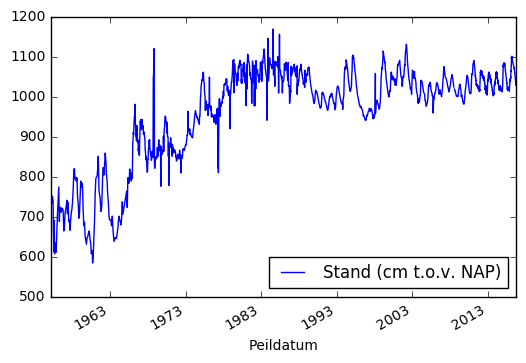

In [208]:
pb.plot()
plt.show() # default color is blue, and default plot is line.

The next problem is to get the mean of the highest three measurements within each hydrological year, which starts on April 1 and ends at March 31.

This requires resampling the data per hydrologic year.

Which can be done with aliases put in the rule of the resample function of pandas series and dataFrames.

Here are options:

# Offset aliases (previously alled time rules) that can be used or resampling a time series or a dataFrame

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

B       business day frequency
C       custom business day frequency (experimental)
D       calendar day frequency
W       weekly frequency
M       month end frequency
SM      semi-month end frequency (15th and end of month)
BM      business month end frequency
CBM     custom business month end frequency
MS      month start frequency
SMS     semi-month start frequency (1st and 15th)
BMS     business month start frequency
CBMS    custom business month start frequency
Q       quarter end frequency
BQ      business quarter endfrequency
QS      quarter start frequency
BQS     business quarter start frequency
A       year end frequency
BA      business year end frequency
AS      year start frequency
BAS     business year start frequency
BH      business hour frequency
H       hourly frequency
T       minutely frequency
S       secondly frequency
L       milliseonds
U       microseconds
N       nanoseconds

But fo sample at some arbitrary interval we need anchored offsets as the resample rule. Here are the options.

# Anchored offsets

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

For some frequencies you can specify an anchoring suffix:

Alias	Description
W-SUN	weekly frequency (sundays). Same as ‘W’
W-MON	weekly frequency (mondays)
W-TUE	weekly frequency (tuesdays)
W-WED	weekly frequency (wednesdays)
W-THU	weekly frequency (thursdays)
W-FRI	weekly frequency (fridays)
W-SAT	weekly frequency (saturdays)
(B)Q(S)-DEC	quarterly frequency, year ends in December. Same as ‘Q’
(B)Q(S)-JAN	quarterly frequency, year ends in January
(B)Q(S)-FEB	quarterly frequency, year ends in February
(B)Q(S)-MAR	quarterly frequency, year ends in March
(B)Q(S)-APR	quarterly frequency, year ends in April
(B)Q(S)-MAY	quarterly frequency, year ends in May
(B)Q(S)-JUN	quarterly frequency, year ends in June
(B)Q(S)-JUL	quarterly frequency, year ends in July
(B)Q(S)-AUG	quarterly frequency, year ends in August
(B)Q(S)-SEP	quarterly frequency, year ends in September
(B)Q(S)-OCT	quarterly frequency, year ends in October
(B)Q(S)-NOV	quarterly frequency, year ends in November
(B)A(S)-DEC	annual frequency, anchored end of December. Same as ‘A’
(B)A(S)-JAN	annual frequency, anchored end of January
(B)A(S)-FEB	annual frequency, anchored end of February
(B)A(S)-MAR	annual frequency, anchored end of March
(B)A(S)-APR	annual frequency, anchored end of April
(B)A(S)-MAY	annual frequency, anchored end of May
(B)A(S)-JUN	annual frequency, anchored end of June
(B)A(S)-JUL	annual frequency, anchored end of July
(B)A(S)-AUG	annual frequency, anchored end of August
(B)A(S)-SEP	annual frequency, anchored end of September
(B)A(S)-OCT	annual frequency, anchored end of October
(B)A(S)-NOV	annual frequency, anchored end of November

To see this at work. Resample the time series by hydrological year and compute the mean head in every hydrological year. This can be done as follows:

In [209]:
pb.resample("AS").mean().head()

,Stand (cm t.o.v. NAP)
Peildatum,
1955-01-01,684.176471
1956-01-01,711.090909
1957-01-01,707.454545
1958-01-01,767.250000
1959-01-01,710.500000


In [115]:
pb.resample("AS-APR").mean().head()

,Stand (cm t.o.v. NAP)
Peildatum,
1954-04-01,729.500000
1955-04-01,685.411765
1956-04-01,706.909091
1957-04-01,722.666667
1958-04-01,766.750000


This uses Groupby functionality. Which we'll inspect next.

In fact, pb.resample(...) yields a DatetimeIndexResampler

In [81]:
Z = pb.resample("AS-APR")
type(Z)

pandas.tseries.resample.DatetimeIndexResampler

This resampler has its own functinality that can be used.  This fucntionality is shown here:

In [83]:
[z for z in dir(Z) if not z.startswith("_")]

['agg',
 'aggregate',
 'apply',
 'asfreq',
 'ax',
 'backfill',
 'bfill',
 'count',
 'ffill',
 'fillna',
 'first',
 'get_group',
 'groups',
 'indices',
 'interpolate',
 'last',
 'max',
 'mean',
 'median',
 'min',
 'name',
 'ndim',
 'ngroups',
 'nunique',
 'obj',
 'ohlc',
 'pad',
 'plot',
 'prod',
 'sem',
 'size',
 'std',
 'sum',
 'transform',
 'var']

Insteresting is the agg function (which is an abbreviation of aggregate function). Here is its documentation:

In [128]:
print(Z.agg.__doc__)


        Apply aggregation function or functions to resampled groups, yielding
        most likely Series but in some cases DataFrame depending on the output
        of the aggregation function

        Parameters
        ----------
        func_or_funcs : function or list / dict of functions
            List/dict of functions will produce DataFrame with column names
            determined by the function names themselves (list) or the keys in
            the dict

        Notes
        -----
        agg is an alias for aggregate. Use it.

        Examples
        --------
        >>> s = Series([1,2,3,4,5],
                        index=pd.date_range('20130101',
                                            periods=5,freq='s'))
        2013-01-01 00:00:00    1
        2013-01-01 00:00:01    2
        2013-01-01 00:00:02    3
        2013-01-01 00:00:03    4
        2013-01-01 00:00:04    5
        Freq: S, dtype: int64

        >>> r = s.resample('2s')
        DatetimeIndexResampler [fr

So we can use any function and apply it on the data grouped by the resampler. These data are the time series consisting of the data that fall in the interval between the last resample moment and the currrent one. Let's try this out to get the three highest values of any hydrological year. For this we define our own function, called `highest3`.

It works by taking z which should be a time series, one consisting of any of the hydrological years in your long-year time series. We use argsort to the indices of the ordered values (we could also directly use the values themselves, but it's good to know argsort exists). The series is sorted from low to high, so we take the last 3 values, i.e. the highest 3. Notice that this also works in Python of the total number of values is less than three, so we don't need to check this. Then we return the mean of these highest three values. That's all.

In [129]:
def highest3(z):
    """returns mean of highest 3 values using np.argsort"""
    I = np.argsort(z)[-3:]
    return z[I].mean()

def highest3a(z):
    """returns mean of highest 3 values using np.sort"""
    z = np.sort(z)
    return z[-3:].mean()

In [130]:
# Apply
print("Using np.argsort")
highest = pb.resample("AS-APR").agg(highest3)
highest.columns = ["mean_highest_value"]
print(highest.head())

print("\nUsing np.sort")
highesta = pb.resample("AS-APR").agg(highest3a)
highesta.columns = ["mean_highest_value"]
print(highesta.head())


Using np.argsort
            mean_highest_value
Peildatum                     
1954-04-01          729.500000
1955-04-01          758.333333
1956-04-01          724.000000
1957-04-01          776.000000
1958-04-01          805.000000

Using np.sort
            mean_highest_value
Peildatum                     
1954-04-01          729.500000
1955-04-01          758.333333
1956-04-01          724.000000
1957-04-01          776.000000
1958-04-01          805.000000


This, of course, solves the problem. Which means we could just as well also compute the lowest 3 at the same time.

And why not also remember the highest and lowest 3

In [131]:
def h_and_l_3(z):
    z = np.sort(z)
    # rounding off for a nicer list, but is not necessary
    return (np.round(z[ :3].mean()),
            np.round(z[-3:].mean()))

# Apply
h_and_l = pb.resample("AS-APR").agg(h_and_l_3)
h_and_l.columns = ["mean_lowest_and_highest_values"]
h_and_l.head()

,mean_lowest_and_highest_values
Peildatum,
1954-04-01,"(730.0, 730.0)"
1955-04-01,"(609.0, 758.0)"
1956-04-01,"(676.0, 724.0)"
1957-04-01,"(681.0, 776.0)"
1958-04-01,"(712.0, 805.0)"


The above functions all `reduce`, that is, they all aggreate the data held by the resampler for each sampling interval to a single value (or a tuple)

In [143]:
def h3(z):
    """Returns a tuple of the three highest value within sampling interval"""
    return (z[np.argsort(z)[-3:]],)

Z.agg(h3).head()

,Stand (cm t.o.v. NAP)
Peildatum,
1954-04-01,"([726.0, 733.0],)"
1955-04-01,"([750.0, 751.0, 774.0],)"
1956-04-01,"([723.0, 723.0, 726.0],)"
1957-04-01,"([741.0, 771.0, 816.0],)"
1958-04-01,"([797.0, 798.0, 820.0],)"


This does indeed give a tuple of the three highest values within each sampling interval, but we can't plot these values easily on the graph of the time series.

Other functionality of the sampler are the indices, i.e. Z.indices. This yields a dictionary with the indices into the overall time series that belong to each resampled timestamp. Therefore we can readily find the values that belong to each hydrological year.

In [159]:
Z.apply(h3).head()

,Stand (cm t.o.v. NAP)
Peildatum,
1954-04-01,"([726.0, 733.0],)"
1955-04-01,"([750.0, 751.0, 774.0],)"
1956-04-01,"([723.0, 723.0, 726.0],)"
1957-04-01,"([741.0, 771.0, 816.0],)"
1958-04-01,"([797.0, 798.0, 820.0],)"


So appy() works the same as agg() at least here.

If we want to plot the three highest points in each hydrlogical year, we could make a list with the sub time series that consist of the three highest points with there timestamp as index. Then, each item in this list is a series consisting of three values, which we may plot one after the other.

In [178]:
dd = list()
def h33(z):
    """Returns a tuple of the three highest value within sampling interval"""
    #print(type(z))
    dd.append(z[z.argsort()[-3:]])
    return

# the time series are put in the list dd
Z.apply(h33).head()
#Z.agg(h33).head()  # alternative works just as well

# for instance show dd[3]
print(type(dd[3]))
dd[3]

<class 'pandas.core.series.Series'>


1957-04-14    741.0
1958-02-16    771.0
1958-03-16    816.0
Name: Stand (cm t.o.v. NAP), dtype: float64

The next step is to plot them. But we first plot the entire data set as a line. Then we plot each sub time series as small circles. The adjacent hydrological years then have a different color.

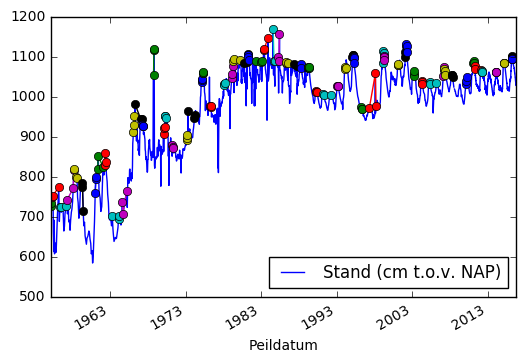

In [177]:
pb.plot()   # plot all data as a line
for d in dd:
    #plot sub time series of the three highest points
    d.plot(marker='o')
plt.show()

If we want to color the data in the same hydrological year in the same color, then we also make a list of all data in each sampling interval next to the list of the three highest values. Each item in dd has the complete time series of the interval, each item in dd3 has a tiem series of the three highest values alone.

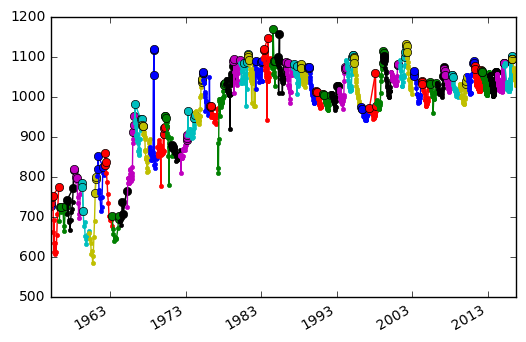

In [185]:
dd  = list() # the entire time series in each sampling interval.
dd3 = list() # only the three highest values in each sampling interval.
def h33(z):
    """Returns a tuple of the three highest value within sampling interval"""
    dd.append(z[:]) # copy entire time series of this sampling interval
    dd3.append(z[z.argsort()[-3:]])
    return

# Here we apply the function, which generates the lists dd and ddr
Z.apply(h33).head()

# Then plot the lists in dd and dd3. Use the same color for all points in the same
# hydrological year.
clr = 'brgkmcy'; i=0 # colors to use
for d3, d  in zip(dd3, dd):
    d.plot(marker='.', color=clr[i]) # all data in hydrological year
    d3.plot(marker='o', color=clr[i]) # highest three
    i += 1
    if i==len(clr): i=0 # set i to 0 when colors are exhausted.
plt.show()

In [157]:
Z = pb.resample("AS-APR")

The resampler object Z also has a method indices, which is a dict with the indices in each sampling interval. The indices are absolute indices, i.e. pointing in the large time series. This prevents having to store time series twice.

In [186]:
Idict = Z.indices
type(Idict)

collections.defaultdict

A dict has keys. So let's show one item in this dict like so:

In [194]:
pb.ix[3]

Stand (cm t.o.v. NAP)    741.0
Name: 1955-04-22 00:00:00, dtype: float64

In [196]:
# Show the indices for one of the keys of the Idict
for k in Idict.keys():
    print(k)  # the key
    print()
    print(Idict[k]) # the indices
    print()
    print(pb.ix[Idict[k]]) # the values beloning to these indices
    break

1983-04-01 00:00:00

[585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611]

            Stand (cm t.o.v. NAP)
Peildatum                        
1983-04-06                 1095.0
1983-04-20                 1098.0
1983-05-04                 1105.0
1983-05-18                 1116.0
1983-06-01                 1119.0
1983-06-15                 1106.0
1983-06-29                 1097.0
1983-07-13                 1083.0
1983-07-27                 1073.0
1983-08-02                 1067.0
1983-08-10                 1067.0
1983-08-24                 1058.0
1983-09-07                 1055.0
1983-09-21                 1049.0
1983-10-05                 1045.0
1983-10-19                  941.0
1983-11-02                 1039.0
1983-11-11                 1038.0
1983-11-30                 1146.0
1983-12-14                 1039.0
1983-12-28                 1041.0
1984-01-11                 1048.0
1984-01-25                

This implies that we can now plot each sub time series like so:

To plot them together with the boundaries of each hydrological year, we first plot the data as a colored line, within each hydrological year. Then we plot the vertical lines that separate the hydrological years. The lines are colored light grey using color=[R, G, B] where R, G and B are all 0.8. ax=get_ylim() gets the extremes of the vertical axis, which are then used to draw the vertical lines.

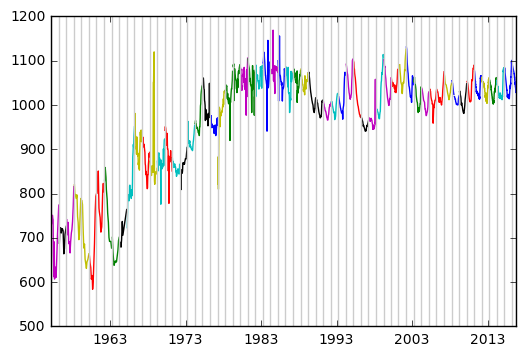

In [207]:
# Show the indices for one of the keys of the Idict
fig, ax = plt.subplots()
for k in Idict.keys():
    I = Idict[k]
    #pb.ix[I].plot(ax=ax) # the values beloning to these indices (can't omit the legend)
    ax.plot(pb.index[I], pb.values[I]) # ordinary plot, doesn't plot a legend on its own

ylim = ax.get_ylim()
for k in Idict.keys():
    i = Idict[k][-1]
    ax.plot(pb.index[[i, i]], ylim, color=[0.8, 0.8, 0.8])
    
plt.show()

That's it.